
    
##### Problem statement - identify a particular website and extract info using beautiful soup or scrapy and store information in a (csv/xml/json)file and use data preprocessing techniques using numpy and pandas , next use data wrangling techniques for missing values, outliers etc, apply visualisation techniques and plot graph for the dataset




### Scraping Laptop Data from Flipkart Website using Beautiful Soup

In [71]:
# importing libraries
from bs4 import BeautifulSoup
import requests
from fake_useragent import UserAgent
import pandas as pd

In [65]:
# opening our output file in append mode
File = open("out.csv", "a")

In [11]:
# specifying user agent
ua = UserAgent()
header = {'user-agent':ua.chrome}

In [24]:
URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
# Making the HTTP Request
webpage = requests.get(URL, headers=header)

# Creating the Soup Object containing all data
soup = BeautifulSoup(webpage.content, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/

In [ ]:
for title in soup.find_all('div', class_ = "_4rR01T"):
    title = title.string
    print(title)
    File.write(f"{title},")
    

In [67]:
for prices in soup.find_all('div',class_ ="_30jeq3 _1_WHN1"):
    prices = prices.text.strip()[1:].replace(',','')
    File.write((f"{prices},"))

In [ ]:
#ratings out of 5
for ratings in soup.find_all('div',class_='_3LWZlK'):
    ratings = float(ratings.text)
    print(ratings)
    File.write((f"{ratings},"))

In [ ]:
# No of ratings
for reviews in soup.find_all('span',class_="_2_R_DZ"):
    reviews = reviews.text
    print(reviews)
    #File.write((f"{reviews},"))

In [69]:
File.close()

In [76]:
df = pd.read_csv('out.csv')
df.head()

,Title,Price,Ratings
0,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,114990,4.6
1,RedmiBook 15 e-Learning Edition Core i3 11th G...,39990,4.3
2,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,39990,4.3
3,RedmiBook 15 e-Learning Edition Core i3 11th G...,52990,4.4
4,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,44990,4.6


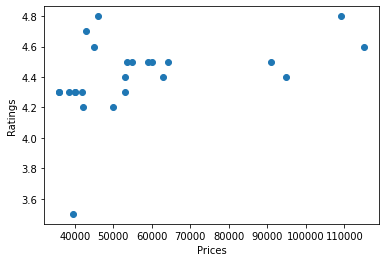

In [84]:
#Vizualizing
import matplotlib.pyplot as plt

plt.scatter(df['Price'],df['Ratings'])
plt.xlabel('Prices')
plt.ylabel('Ratings')
plt.show()